# **Introduction**
The goal of this project is to classify Chest X-ray images as normal(healthy) or Pneumonia cases using Convolutional neural networks.

Convolutional Neural network is a type of Deep learning algorithm  that performs very well in image classification tasks.

# **Data**
The data is hosted by Kaggle.com at this url [Data source](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) .

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!unzip '/content/drive/My Drive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_bacteria_3905.jpeg  
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_bacteria_3906.jpeg  
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_bacteria_3907.jpeg  
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_bacteria_3908.jpeg  
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_bacteria_3909.jpeg  
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_bacteria_3910.jpeg  
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_bacteria_3911.jpeg  
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_virus_2605.jpeg  
  inflating: archive/chest_xray/__MACOSX/chest_xray/train/PNEUMONIA/._person1496_virus_2606.jpeg  
  inflating: archive/chest_xray/__MAC

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from matplotlib import pyplot as plt


## **Plot two images, normal and pneumonia chest X-ray**

In [ ]:
normal_img = load_img('archive/chest_xray/chest_xray/test/NORMAL/NORMAL2-IM-0206-0001.jpeg', target_size=(300,300))
pneumonia_img = load_img('archive/chest_xray/chest_xray/train/PNEUMONIA/person382_bacteria_1742.jpeg', target_size=(300,300))

fig , sp = plt.subplots(ncols=2,nrows=1, figsize=(17,17))
sp[0].imshow(normal_img)
sp[1].imshow(pneumonia_img)

FileNotFoundError: ignored

## **Create image generator to extract and rescale images into classes from subdirector**

- Images are rescaled by 1/255. all train, validation , and test images needs to processed the same way.

In [ ]:
from tensorflow.keras.preprocessing.image import  ImageDataGenerator


generator_params={
    'rescale': 1./255
}
train_generator = ImageDataGenerator(**generator_params)
validation_generator = ImageDataGenerator(**generator_params)
test_generator = ImageDataGenerator(**generator_params)

# Count number of train data set

In [ ]:
!ls -1 'archive/chest_xray/train/NORMAL' | wc -l 
!ls -1 'archive/chest_xray/train/PNEUMONIA' | wc -l 

368
587


# Count number of validation dataset

In [ ]:
!ls -1 'archive/chest_xray/val/NORMAL' | wc -l 
!ls -1 'archive/chest_xray/val/PNEUMONIA' | wc -l 

8
8


# Count number of test dataset

In [ ]:
!ls -1 'archive/chest_xray/test/NORMAL' | wc -l 
!ls -1 'archive/chest_xray/test/PNEUMONIA' | wc -l 

50
53


There is more pnuemonia images than normal images in train and test subfolders

In [ ]:
train_data = train_generator.flow_from_directory(
    'archive/chest_xray/train',
    target_size=(300,300),
    shuffle=True,
    class_mode='binary',
    batch_size=64
)

val_data = train_generator.flow_from_directory(
    'archive/chest_xray/test',
    target_size=(300,300),
    shuffle=True,
    class_mode='binary',
    batch_size=64
)

test_data = train_generator.flow_from_directory(
    'archive/chest_xray/val',
    target_size=(300,300),
    shuffle=True,
    class_mode='binary',
    batch_size=32
)

Found 955 images belonging to 2 classes.
Found 103 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
print(train_data.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [ ]:
#from the output of the image generator we can get the number of images in each subfolders
#This will be used to calculate the number of steps per epoch

num_train_img = 955
num_test_img = 103
num_val_img = 16

# **CNN Architecture**

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
                    layers.Conv2D(64,(3,3),input_shape=(300,300,3), activation='relu'),
                    layers.MaxPooling2D(2,2),
                    layers.Dropout(0.2),
                    layers.Conv2D(128,(3,3), activation='relu'),
                    layers.MaxPooling2D(2,2),
                    layers.Dropout(0.2),
                    layers.Flatten(),
                    layers.Dense(512, activation='relu'),
                    layers.Dropout(0.2),
                    layers.Dense(10, activation='relu'),
                    layers.Dropout(0.2),
                    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 149, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 73, 73, 128)       0

In [ ]:
from tensorflow.keras.optimizers import  Adam

opt = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


# Add callback to stop at 98% accuracy

In [ ]:
from tensorflow.keras.callbacks import Callback

class EarlyStoppingCallback(Callback):

  def on_epoch_end(self, epoch, log={}):
    if(log.get('accuracy') >= .98):
      print("\n Accuracy at 98%. Early stoping")
      self.model.stop_training = True

In [ ]:

history = model.fit(train_data,# np.zeros(5),
                    epochs=3,
                    verbose=0)
len(history.history['loss']) 

3

In [ ]:
base_path = 'drive/My Drive/deep_learning/'
model.save(base_path+'chest_xray_model4.h5')

In [ ]:
import numpy as np
#!pip install tensorflow-model-optimization
import tensorflow as tf
from tensorflow_model_optimization.sparsity import keras as sparsity

# Backend agnostic way to save/restore models
# _, keras_file = tempfile.mkstemp('.h5')
# print('Saving model to: ', keras_file)
# tf.keras.models.save_model(model, keras_file, include_optimizer=False)

# Load the serialized model
#loaded_model = tf.keras.models.load_model('drive/My Drive/deep_learning/chest_xray_model4.h5')

epochs = 3
end_step = np.ceil(1.0 * num_train_img / 64).astype(np.int32) * epochs
print(end_step)

new_pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.50,
                                                   final_sparsity=0.90,
                                                   begin_step=0,
                                                   end_step=end_step,
                                                   frequency=100)
}

new_pruned_model = sparsity.prune_low_magnitude(loaded_model, **new_pruning_params)
new_pruned_model.summary()

new_pruned_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy'])

45


/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:218: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:225: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  aggregation=tf.VariableAggregation.MEAN)
/usr/local/lib/python3.7/dist-packages/tensorflow_model_optimization/python/core/sparsity/keras/pruning_wrapper.py:238: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  trainable=False)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d   (None, 298, 298, 64)     3522      
 (PruneLowMagnitude)                                             
                                                                 
 prune_low_magnitude_max_poo  (None, 149, 149, 64)     1         
 ling2d (PruneLowMagnitude)                                      
                                                                 
 prune_low_magnitude_dropout  (None, 149, 149, 64)     1         
  (PruneLowMagnitude)                                            
                                                                 
 prune_low_magnitude_conv2d_  (None, 147, 147, 128)    147586    
 1 (PruneLowMagnitude)                                           
                                                                 
 prune_low_magnitude_max_poo  (None, 73, 73, 128)      1

In [ ]:
# Add a pruning step callback to peg the pruning step to the optimizer's
# step. Also add a callback to add pruning summaries to tensorboard
import tempfile
logdir = tempfile.mkdtemp()
callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=logdir, profile_batch=0)
]

new_pruned_model.fit(train_data,
          batch_size=64,
          epochs=1,
          verbose=1)

score = new_pruned_model.evaluate(test_data, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ResourceExhaustedError: ignored

In [ ]:
import tempfile
import os

logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]
  
model_for_pruning.fit(train_data,
                  batch_size=64, epochs=epochs, 
                  callbacks=callbacks)

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


ResourceExhaustedError: ignored

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch= num_train_img/64,
    validation_data=val_data,
    validation_steps=num_test_img/64,
    epochs=10,
    callbacks=[EarlyStoppingCallback()]
)

Epoch 1/10


ResourceExhaustedError: ignored

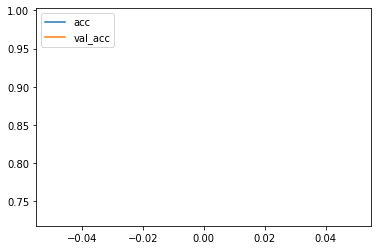

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend(loc="upper left")
plt.show()

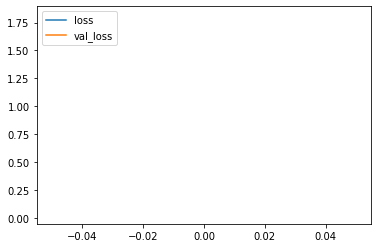

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc="upper left")
plt.show()

# **Testing model prediciton**

In [ ]:
test_normal = load_img('archive/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg', target_size=(300,300))
test_pneumonia = load_img('archive/chest_xray/val/PNEUMONIA/person1954_bacteria_4886.jpeg',target_size=(300,300))



In [ ]:
tn_array = img_to_array(test_normal) /255
tp_array = img_to_array(test_pneumonia) /255

In [ ]:
print(tn_array.shape)

(300, 300, 3)


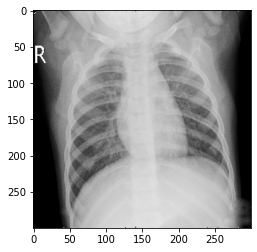

In [ ]:
plt.imshow(tn_array)

In [ ]:
model.predict(tn_array.reshape(-1,300,300,3)).item()

0.00014020818343851715

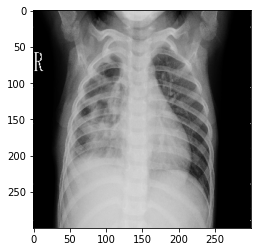

In [ ]:
plt.imshow(tp_array)

In [ ]:
model.predict(tp_array.reshape(-1,300,300,3)).item()
#prediction = model.probability_proba()

NameError: ignored

# **Conclusion**

The model can clearly classify the images as Normal or Pneumonia. More work can be  done to improve the Validation accuracy by using:
* Batch normalization
* Adjusting the learning rate and momentum
* Trying out different model architectures